# Heisenberg uncertainty principle


## Introduction

You have probably heard of the uncertainty principle, even outside of your physics courses. A common colloquial restatement of uncertainty is "By looking at something, you influence it." That is certainly true. But a more physical way of describing uncertainty is that there are certain physical observables that have an incompatibility that prevents them both from being simultaneously known to arbitrary accuracy. Many students first encounter the pair of incompatible variables $x$ and $p_x$, meaning the position along one axis called the $x$-axis, and the linear momentum along that direction, respectively. For those variables the constraint on uncertainty is written
$$\Delta x \Delta p_x \geq \frac{\hbar}{2}.$$
Here, $\Delta x$ is called the "uncertainty in $x$", which has the same definition as standard deviation in statistics, and can be defined as
$$\Delta x = \sqrt{\langle x^2 \rangle - \langle x \rangle^2}.$$
$\Delta p_x$ is defined in the same way.
Here, we will not derive this uncertainty relation; we will point out that it is consistent with our understanding of classical waves. That is, a wave with truly one perfect frequency $f$ and wavelength $\lambda$ would go on and on forever as a perfect sinusoid. Quantum mechanically, this would correspond to knowing the momentum perfectly according to de Broglie's hypothesis: $\lambda = h/p$. But in order to know $where$ a wave-like particle is located, the wave describing it must become more sharply peaked in space, like a very narrow Gaussian, for example. We know that we can express any continuous function, including such sharply-peaked wave functions, as a Fourier series of sinusoidal functions with different wavelengths. But as the wave function becomes more sharply peaked (and the position is better known), we will require more terms in the Fourier series, meaning a mixture of more wavelengths (and thus, quantum mechanically, more values of momentum).

Stated more simply: a state with a well-defined momentum (a perfect sinusoid in space) has very uncertain position. A state with a well-defined position (like a Dirac delta distribution) has a very uncertain momentum.

There are other variables that exhibit such incompatibility. For example, a particle's spin may have a well-defined projection along one axis, but then we know nothing about the project on an orthogonal axis. For example the state $|0\rangle \sim |\uparrow\rangle$ (for a qubit or spin-1/2 particle) has a definite projection along the $z$ axis (of 1 in the context of a qubit, and of $\hbar/2$ in the context of a spin-1/2 particle). But this state can be written as a superposition of two states each of which has a well-defined projection onto the $x$ axis:
$$|0\rangle = \frac{1}{\sqrt{2}}(|+\rangle_x+|-\rangle_x)$$
or equivalently
$$\begin{pmatrix} 1 \\ 0\end{pmatrix} = \frac{1}{\sqrt{2}}\left[\frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1\end{pmatrix}+\frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ -1\end{pmatrix}\right].$$
$|+\rangle_x$ has a well-defined projection onto $x$, as does $|-\rangle_x$. So if we specify the projection of a state along the $x$ axis, we do not know the projection along the $z$ axis. And if we specify the projection on the $z$ axis, we don't know the projection along $x$. There are minor differences when discussing this in the context of spin and in qubits. But generally speaking, eigenstates of the Pauli matrices have an interesting relationship that we can explore.
Throughout this lesson, we will be experimentally checking our intuition for the uncertainty in these incompatible variables, and verifying that uncertainty relations hold on IBM quantum computers.

Well, you may recall that the uncertainty relation between linear position and momentum could be written differently, explicitly using the commutation relation between the operators $x$ and $p_x$:
$$\Delta x \Delta p_x \geq \frac{1}{2}|\langle [x,p_x] \rangle|$$
where
$$[x,p_x] = xp_x-p_xx$$
is the commutator of $x$ and $p_x$.
This is the form that that can be most easily extended to the Pauli operators. Generally, for two operators $A$ and $B$,
$$\Delta A \Delta B \geq \frac{1}{2}|\langle [A,B] \rangle|.$$
And in the case of the Pauli matrices $X$ and $Z$, we need $[X,Z]$ in order to calculate
$$\Delta X \Delta Z \geq \frac{1}{2}|\langle [X,Z] \rangle|.$$
We show this here, and leave similar calculations to the reader as an exercise:
$$[X,Z] = XZ-ZX = \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}\begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}-\begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}\begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}$$
$$[X,Z] = \begin{pmatrix}0 & -1 \\ 1 & 0\end{pmatrix}-\begin{pmatrix}0 & 1 \\ -1 & 0\end{pmatrix} = 2\begin{pmatrix}0 & -1 \\ 1 & 0\end{pmatrix}$$
This is a perfectly acceptable answer, but with one more step, we see
$$[X,Z] = -2i\begin{pmatrix}0 & -i \\ i & 0\end{pmatrix}=-2iY$$
Our uncertainty relation thus becomes
$$\Delta X \Delta Z \geq |\langle Y \rangle|.$$

### Check-in question

Determine $[X,Y]$ and $[Y,Z]$. Use this to write down the uncertainty relations between $X$ & $Y$, and $Y$ & $Z$.


### Verify consistency

Before moving on, let us check that this was consistent with our previous finding. We used the state $|\psi\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix}.$ And we found that $\Delta X \Delta Z  = 0.171.$ Now we know this product should be greater than or equal to
$$|\langle Y \rangle|=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \end{pmatrix}\begin{pmatrix}0 & -i \\ i & 0\end{pmatrix}\frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix}$$
$$|\langle Y \rangle| = \frac{1}{2}\begin{pmatrix} 1 & 1 \end{pmatrix}\begin{pmatrix} -i \\ i \end{pmatrix} = \frac{1}{2}(-i+i) = 0.$$
So indeed, $\Delta X \Delta Z  = 0.171 \geq |\langle Y \rangle|=0$

In [18]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
backend_sim = AerSimulator()
sim = AerSimulator()

#Import an estimator, this time from qiskit (we import from Runtime for real hardware)
from qiskit.primitives import BackendSampler
sampler = BackendSampler(backend = backend_sim)
import numpy as np
from qiskit.visualization import plot_bloch_vector, plot_histogram
import matplotlib.pyplot as plt

from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit, Parameter
from qiskit import QuantumCircuit, transpile
from qiskit.result import marginal_counts
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator


import matplotlib.ticker as tck
from qiskit.visualization import plot_bloch_multivector


/var/folders/8x/4b43jvsj34l67v7lt969s9bm0000gn/T/ipykernel_27650/1823421372.py:8: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler = BackendSampler(backend = backend_sim)


#### Non commutative measurements
 #### Exercise: Write a circuit that prepares a random state and measures it on the Z basis and then the X basis, and then vice-versa (X basis first, then Z basis) and compare the statistics


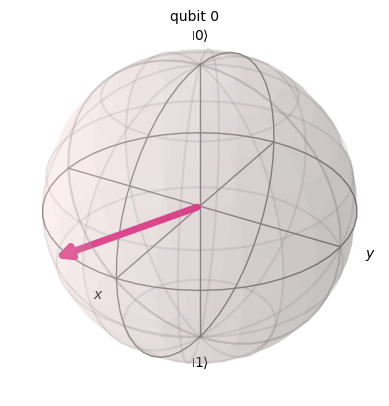

In [ ]:

# proposed solution
def random_state():
    # Random state
    theta = np.random.uniform(0, 2*np.pi)
    phi = np.random.uniform(0, np.pi)
    psi = [np.cos(phi/2), np.exp(1j*theta)*np.sin(phi/2)]
    return psi
psi0 = random_state()

plot_bloch_multivector(psi0)


In [20]:
# Exercise: Circuit to measure in Z basis first, then X basis
# Note: After measuring in Z, the state collapses!
# Task: Create a circuit with 2 classical bits to store both measurement results

shots = 10000

# Your code here
# qc_z_then_x = QuantumCircuit(?, ?)
# qc_z_then_x.initialize(psi0, 0)
# ... Add measurement in Z basis
# ... Add rotation to X basis
# ... Add measurement in X basis

# display(qc_z_then_x.draw('mpl'))

# Run and analyze
# job_zthenx = sampler.run([qc_z_then_x], shots=shots)
# result_zthenx = job_zthenx.result()
# counts_zthenx = result_zthenx[0].data.c.get_counts()
# print("Measuring Z first, then X:")
# print(f"Counts: {counts_zthenx}")
# plot_histogram(counts_zthenx, title="Z then X measurement")


In [21]:
# Exercise: Circuit to measure in X basis first, then Z basis
# Compare these results with the previous measurement order

# Your code here
# qc_x_then_z = QuantumCircuit(?, ?)
# qc_x_then_z.initialize(psi0, 0)
# ... Add rotation to X basis (H gate)
# ... Add measurement in X basis
# ... Add rotation back (H gate)
# ... Add measurement in Z basis

# display(qc_x_then_z.draw('mpl'))

# Run and analyze
# job_xthenx = sampler.run([qc_x_then_z], shots=shots)
# result_xthenx = job_xthenx.result()
# counts_xthenx = result_xthenx[0].data.c.get_counts()
# print("\nMeasuring X first, then Z:")
# print(f"Counts: {counts_xthenx}")
# plot_histogram(counts_xthenx, title="X then Z measurement")

# Question: How do the statistics differ when you change the measurement order?


We can quantify this using uncertainty, or variance. The "uncertainty" is often defined to be the square root of the "variance" of a distribution. That is, the uncertainty for some observable $S$ is denoted $\Delta S$ and is given by

$$(\Delta S)^2 \equiv \langle (S - \langle S \rangle)^2 \rangle$$
$$(\Delta S)^2 = \langle S^2 - 2 S \langle S \rangle +\langle S \rangle^2 \rangle$$
$$(\Delta S)^2 = \langle S^2 \rangle - \langle S \rangle^2$$

For the case of Pauli matrices, for which $S^2 = I$, this becomes

$$(\Delta S)^2 = 1 - \langle S \rangle^2$$

Let's apply this to a concrete example. Let's start with the state $|\psi\rangle =  |+\rangle_y = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ i \end{pmatrix},$ and let's determine the uncertainty of the observable $X$ in that state.

We can create an arbitrary initial state using ```qc.initialize()```. Note that the syntax for the imaginary unit here is $1j$.

### Check-in question: 

Calculate the uncertainty of $X$ in the state $|+\rangle_y = |+i\rangle$, by hand.


# Let's verify the Heisenberg principle for the operators Z and X

### In order to do so we need three different experiments: one to compute the deviation of the measurements, and one to compute the expectation value of the commutator.


In [22]:
# Exercise: Measure X for the state |+⟩_y = (|0⟩ + i|1⟩)/√2
# This state is prepared by Ry(π/2)

shots = 10000

# Create circuit: Prepare state, rotate to X basis, measure
# qc_x = QuantumCircuit(1, 1)
# qc_x.ry(?, 0)      # Prepare |+⟩_y state
# qc_x.??(0)         # Rotate to X basis
# qc_x.measure(0, 0)

# Run the circuit
# job_x = sampler.run([qc_x], shots=shots)
# result_x = job_x.result()
# counts_x = result_x[0].data.c.get_counts()

# Compute statistics (remember: 0 → eigenvalue +1, 1 → eigenvalue -1)
# n0_x = counts_x.get('0', 0)
# n1_x = counts_x.get('1', 0)
# exp_x = (n0_x - n1_x) / shots
# delta_x = np.sqrt(1 - exp_x**2)  # For Pauli operators: Δ² = 1 - ⟨X⟩²

# print(f"X measurement:")
# print(f"  Counts: {counts_x}")
# print(f"  ⟨X⟩ = {exp_x:.4f}")
# print(f"  ΔX = {delta_x:.4f}")


In [23]:
# Exercise: Verify Heisenberg uncertainty principle: ΔX·ΔZ ≥ |⟨Y⟩|

# print("="*50)
# print("HEISENBERG UNCERTAINTY VERIFICATION")
# print("="*50)
# print(f"State: |+⟩_y = (|0⟩ + i|1⟩)/√2")
# print(f"\nUncertainty product: ΔX·ΔZ = {delta_x * delta_z:.4f}")
# print(f"Lower bound: |⟨Y⟩| = {abs(exp_y):.4f}")
# print(f"Difference: ΔX·ΔZ - |⟨Y⟩| = {delta_x * delta_z - abs(exp_y):.4f}")

# Check if the principle holds
# if delta_x * delta_z >= abs(exp_y):
#     print("\n✅ Uncertainty principle verified!")
# else:
#     print("\n⚠️ Uncertainty principle violated")
# print("="*50)


In [24]:
# Exercise: Measure Y (apply S† and H to rotate to Y basis)

# qc_y = QuantumCircuit(1, 1)
# qc_y.ry(?, 0)      # Prepare |+⟩_y state  
# qc_y.??(0)         # Apply S† gate
# qc_y.??(0)         # Apply H gate
# qc_y.measure(0, 0)

# job_y = sampler.run([qc_y], shots=shots)
# result_y = job_y.result()
# counts_y = result_y[0].data.c.get_counts()

# n0_y = counts_y.get('0', 0)
# n1_y = counts_y.get('1', 0)
# exp_y = (n0_y - n1_y) / shots

# print(f"Y measurement:")
# print(f"  Counts: {counts_y}")
# print(f"  ⟨Y⟩ = {exp_y:.4f}")
# print(f"  |⟨Y⟩| = {abs(exp_y):.4f}")


In [25]:
# Exercise: Measure Z (direct measurement in computational basis)

# qc_z = QuantumCircuit(1, 1)
# qc_z.ry(?, 0)      # Prepare |+⟩_y state
# qc_z.measure(0, 0)  # Measure directly in Z basis

# job_z = sampler.run([qc_z], shots=shots)
# result_z = job_z.result()
# counts_z = result_z[0].data.c.get_counts()

# Compute statistics
# n0_z = counts_z.get('0', 0)
# n1_z = counts_z.get('1', 0)
# exp_z = (n0_z - n1_z) / shots
# delta_z = np.sqrt(1 - exp_z**2)

# print(f"Z measurement:")
# print(f"  Counts: {counts_z}")
# print(f"  ⟨Z⟩ = {exp_z:.4f}")
# print(f"  ΔZ = {delta_z:.4f}")


# Let's now loop through the Bloch sphere

Consider a generic qubit state prepared by an $R_y(\theta)$ rotation:

$$
|\psi\rangle = \cos(\theta/2)|0\rangle + \sin(\theta/2)|1\rangle
$$

where we sweep $\theta$ from $0$ to $\pi$ (this corresponds to $\phi = 0$ in the general Bloch sphere parameterization)

## Exercise: Verify the Heisenberg Uncertainty Principle

**Goal:** Test the uncertainty relation $\Delta X \cdot \Delta Z \geq |\langle Y \rangle|$ for different quantum states.

**Tasks:**
1. **Change $\theta$**: Sweep through different values of $\theta$ from $0$ to $\pi$ to explore various points on the Bloch sphere
2. **Measure in three bases**: For each $\theta$, measure the state in:
   - Z basis (direct measurement)
   - X basis (measure after H gate)
   - Y basis (measure after S† and H gates)
3. **Calculate uncertainties**: Compute $\Delta X$ and $\Delta Z$ from the measurement statistics
4. **Calculate expectation**: Compute $|\langle Y \rangle|$ from Y-basis measurements
5. **Verify the principle**: Check that $\Delta X \cdot \Delta Z \geq |\langle Y \rangle|$ holds for all $\theta$ values

**Output:** A plot showing:
- X-axis: $\theta$
- Y-axis: Expectation values
- Comparison between $\Delta X \cdot \Delta Z$ (should always be above the bound) and $|\langle Y \rangle|$ (the bound)
- Error bars showing measurement uncertainties

**Hardware:** Run on a real QPU or noisy simulator to see realistic quantum effects and measurement errors.


# Run it now on a QPU

In [ ]:
# # Uncomment to use real quantum hardware
# # transpiling the circuits
# from qiskit_ibm_runtime import QiskitRuntimeService
# # Let s find the least busy backend
# service = QiskitRuntimeService()
# backend = service.least_busy()
# print(backend.name)
# sampler = Sampler(mode=backend)
# sampler.options.default_shots = 100

# from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
# pm = generate_preset_pass_manager(optimization_level=3, backend=backend) 


In [ ]:
# ============================================================================
# IN CASE NO QPU ACCESS - Use Noisy Simulator  
# ============================================================================
# Create a noisy simulator (digital twin) instead of using real hardware
from qiskit_ibm_runtime import QiskitRuntimeService
# Use a local fake backend (no Runtime service connection needed)
from qiskit_ibm_runtime.fake_provider import FakeFez

backend = FakeFez()
print(f"Using noise model from: {backend.name}")

# Create a noisy simulator using the backend's noise characteristics
from qiskit_aer import AerSimulator
backend = AerSimulator.from_backend(backend)

# Use BackendSampler with the noisy simulator
from qiskit.primitives import BackendSampler
sampler = Sampler(mode=backend)
sampler.options.default_shots = 100

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=3, backend=backend) 

Using noise model from: fake_fez


In [ ]:
# Exercise: Define parametric circuits using Ry(θ) rotation
theta = Parameter('θ')

# Circuit for Z basis measurement
qc_z = QuantumCircuit(1, 1)
qc_z.ry(theta, 0)
qc_z.measure(0, 0)

# Exercise: Create circuit for X basis measurement
# Hint: Add H gate before measurement to rotate to X basis
qc_x = QuantumCircuit(1, 1)
# Your code here...


# Exercise: Create circuit for Y basis measurement  
# Hint: Add S† (sdg) and H gates before measurement to rotate to Y basis
qc_y = QuantumCircuit(1, 1)
# Your code here...



In [13]:
# transpiling the circuits
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)

qc_z_transpiled = pm.run(qc_z)
qc_x_transpiled = pm.run(qc_x)
qc_y_transpiled = pm.run(qc_y)

In [26]:
# Configure parameter sweep
shots = 10_000
n_points = 100  # Number of theta values to test

# Create theta values from 0 to π
theta_values = np.linspace(0, np.pi, n_points)

# IMPORTANT: SamplerV2 requires parameter values as list of lists
param_sweep = [[float(t)] for t in theta_values]

print(f"Testing {n_points} states with {shots:,} shots each")
print(f"Parameters format: list of {len(param_sweep)} lists, each with {len(param_sweep[0])} value(s)")


Testing 100 states with 10,000 shots each
Parameters format: list of 100 lists, each with 1 value(s)


In [27]:
# Submit jobs to quantum hardware
sampler = Sampler(mode=backend)
sampler.options.default_shots = shots

print("\n🚀 Submitting jobs to quantum hardware...")
print(f"   - Circuit 1: Z basis measurement ({n_points} parameter values)")
print(f"   - Circuit 2: X basis measurement ({n_points} parameter values)")
print(f"   - Circuit 3: Y basis measurement ({n_points} parameter values)")

# SamplerV2 syntax: list of (circuit, param_values) tuples
job = sampler.run([
    (qc_z_transpiled, param_sweep),
    (qc_x_transpiled, param_sweep),
    (qc_y_transpiled, param_sweep),
])

print(f"\n>>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")



🚀 Submitting jobs to quantum hardware...
   - Circuit 1: Z basis measurement (100 parameter values)
   - Circuit 2: X basis measurement (100 parameter values)
   - Circuit 3: Y basis measurement (100 parameter values)


ValueError: Length of () inconsistent with last dimension of [[0.        ]
 [0.03173326]
 [0.06346652]
 [0.09519978]
 [0.12693304]
 [0.1586663 ]
 [0.19039955]
 [0.22213281]
 [0.25386607]
 [0.28559933]
 [0.31733259]
 [0.34906585]
 [0.38079911]
 [0.41253237]
 [0.44426563]
 [0.47599889]
 [0.50773215]
 [0.53946541]
 [0.57119866]
 [0.60293192]
 [0.63466518]
 [0.66639844]
 [0.6981317 ]
 [0.72986496]
 [0.76159822]
 [0.79333148]
 [0.82506474]
 [0.856798  ]
 [0.88853126]
 [0.92026451]
 [0.95199777]
 [0.98373103]
 [1.01546429]
 [1.04719755]
 [1.07893081]
 [1.11066407]
 [1.14239733]
 [1.17413059]
 [1.20586385]
 [1.23759711]
 [1.26933037]
 [1.30106362]
 [1.33279688]
 [1.36453014]
 [1.3962634 ]
 [1.42799666]
 [1.45972992]
 [1.49146318]
 [1.52319644]
 [1.5549297 ]
 [1.58666296]
 [1.61839622]
 [1.65012947]
 [1.68186273]
 [1.71359599]
 [1.74532925]
 [1.77706251]
 [1.80879577]
 [1.84052903]
 [1.87226229]
 [1.90399555]
 [1.93572881]
 [1.96746207]
 [1.99919533]
 [2.03092858]
 [2.06266184]
 [2.0943951 ]
 [2.12612836]
 [2.15786162]
 [2.18959488]
 [2.22132814]
 [2.2530614 ]
 [2.28479466]
 [2.31652792]
 [2.34826118]
 [2.37999443]
 [2.41172769]
 [2.44346095]
 [2.47519421]
 [2.50692747]
 [2.53866073]
 [2.57039399]
 [2.60212725]
 [2.63386051]
 [2.66559377]
 [2.69732703]
 [2.72906028]
 [2.76079354]
 [2.7925268 ]
 [2.82426006]
 [2.85599332]
 [2.88772658]
 [2.91945984]
 [2.9511931 ]
 [2.98292636]
 [3.01465962]
 [3.04639288]
 [3.07812614]
 [3.10985939]
 [3.14159265]]

In [28]:
print(f">>> Job Status: {job.status()}")
result= job.result()
result[0].data.c[2].get_counts()

NameError: name 'job' is not defined

In [29]:
# Exercise: Define helper function to compute statistics from measurement counts
def compute_stats(counts, shots):
    """
    Compute expectation value and standard deviation for Pauli measurements
    Measurement outcome '0' corresponds to eigenvalue +1
    Measurement outcome '1' corresponds to eigenvalue -1
    
    Returns:
        exp_val: Expectation value <S>
        std_dev: Standard deviation ΔS
        exp_val_err: Statistical uncertainty in expectation value
    """
    # Your code here
    # Step 1: Get counts for '0' and '1' outcomes
    # n_0 = counts.get('0', 0)
    # n_1 = counts.get('1', 0)
    
    # Step 2: Compute expectation value: <S> = (+1)*P(0) + (-1)*P(1)
    # exp_val = ?
    
    # Step 3: Compute variance for Pauli operators: σ² = 1 - <S>²
    # variance = ?
    # std_dev = ?
    
    # Step 4: Compute statistical uncertainty (binomial error)
    # exp_val_err = np.sqrt(variance / shots)
    
    pass  # Replace with your implementation


In [ ]:
# Exercise: Process measurement results for all theta values
# Initialize arrays to store results
delta_x_array = []
delta_z_array = []
exp_y_array = []
uncertainty_product = []
delta_x_err = []
delta_z_err = []
exp_y_err = []

# Loop through all theta values
# for i, theta_val in enumerate(theta_values):
    # Step 1: Get counts for each measurement basis
    # counts_z = result[0].data.c[i].get_counts()
    # counts_x = result[1].data.c[i].get_counts()
    # counts_y = result[2].data.c[i].get_counts()
    
    # Step 2: Compute statistics for each basis using compute_stats()
    # exp_x, delta_x, err_x = compute_stats(counts_x, shots)
    # exp_z, delta_z, err_z = ?
    # exp_y, delta_y, err_y = ?
    
    # Step 3: Store results
    # delta_x_array.append(delta_x)
    # delta_z_array.append(delta_z)
    # exp_y_array.append(abs(exp_y))  # We need |<Y>|
    # uncertainty_product.append(delta_x * delta_z)
    # delta_x_err.append(err_x)
    # delta_z_err.append(err_z)
    # exp_y_err.append(err_y)

# Convert to numpy arrays
# delta_x_array = np.array(delta_x_array)
# delta_z_array = np.array(delta_z_array)
# exp_y_array = np.array(exp_y_array)
# uncertainty_product = np.array(uncertainty_product)

# print("✅ Data processing complete!")
# print(f"   Processed {len(theta_values)} theta values")
# print(f"   Mean ΔX·ΔZ = {np.mean(uncertainty_product):.4f}")
# print(f"   Mean |<Y>| = {np.mean(exp_y_array):.4f}")


# Visualization of Results

The following cells provide **complete plotting code with example data** so you can see what the final plots should look like.

**Your task:** 
- Replace the example data variables with your actual measurement results from the cells above
- Make sure your variable names match (e.g., `uncertainty_product`, `delta_x_array`, etc.)
- Run the cells to verify your implementation of the Heisenberg uncertainty principle!

The plots show:
1. **Main verification plot**: ΔX·ΔZ (blue) should always be above |⟨Y⟩| (red dashed)
2. **Component plot**: Individual uncertainties and how they change with θ
3. **Summary statistics**: Numerical verification of the principle


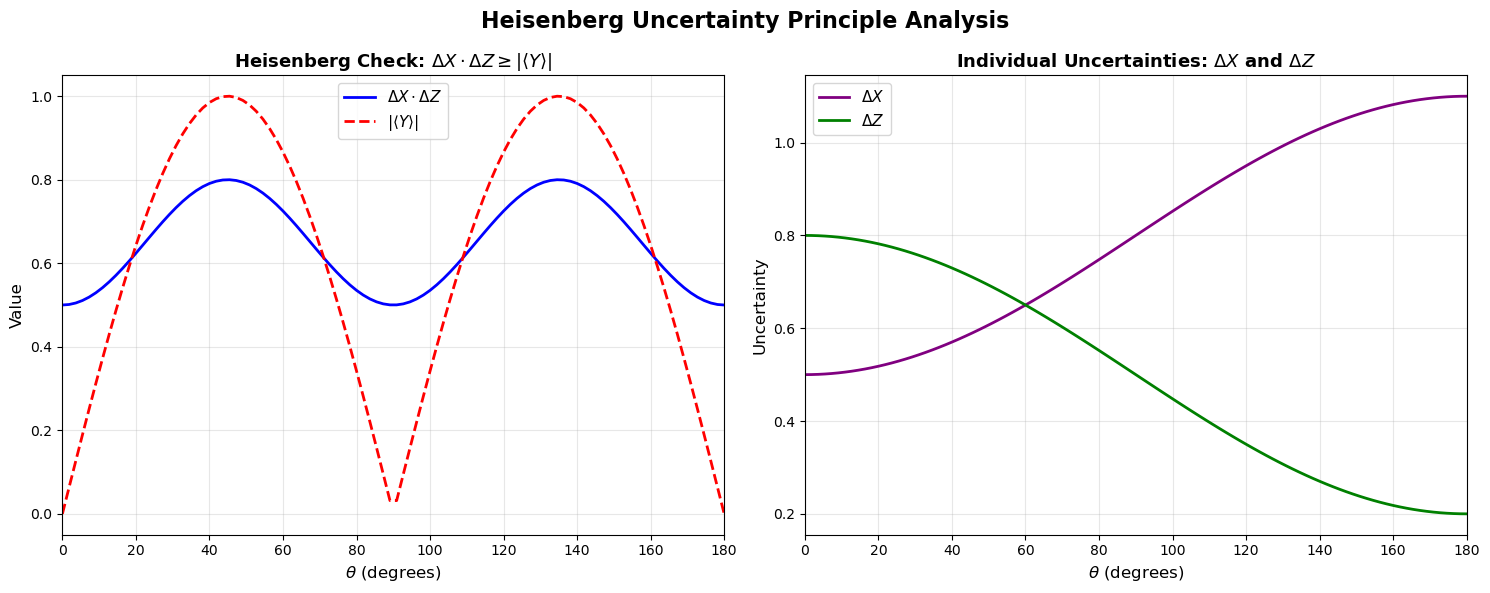

In [33]:
# Plot to verify Heisenberg Uncertainty Principle
# This example uses synthetic data - replace with your actual measurement results!

# Example data (replace these with your actual results from the measurements)
theta_degrees_example = np.linspace(0, 180, 100)
uncertainty_product_example = 0.5 + 0.3 * np.sin(2 * np.radians(theta_degrees_example))**2
exp_y_example = np.abs(np.sin(2 * np.radians(theta_degrees_example)))

# Example individual uncertainties
# (You already have these in the notebook; keep or replace with real arrays)
# delta_x_example
# delta_z_example

# Once you have real data, use:
# theta_degrees = np.degrees(theta_values)
# uncertainty_product = your_actual_uncertainty_product
# exp_y_array = your_actual_exp_y_array
# delta_x_array = your_actual_delta_x_array
# delta_z_array = your_actual_delta_z_array

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- Left: Heisenberg inequality verification ---
axes[0].plot(theta_degrees_example, uncertainty_product_example, 'b-',
             linewidth=2, label=r'$\Delta X \cdot \Delta Z$')
axes[0].plot(theta_degrees_example, exp_y_example, 'r--',
             linewidth=2, label=r'$|\langle Y \rangle|$')

axes[0].set_xlabel(r'$\theta$ (degrees)', fontsize=12)
axes[0].set_ylabel('Value', fontsize=12)
axes[0].set_title(r'Heisenberg Check: $\Delta X \cdot \Delta Z \geq |\langle Y \rangle|$',
                  fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11, loc='best')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([0, 180])

# --- Right: Individual uncertainties ---
axes[1].plot(theta_degrees_example, delta_x_example, color='purple',
             linewidth=2, label=r'$\Delta X$')
axes[1].plot(theta_degrees_example, delta_z_example, color='green',
             linewidth=2, label=r'$\Delta Z$')

axes[1].set_xlabel(r'$\theta$ (degrees)', fontsize=12)
axes[1].set_ylabel('Uncertainty', fontsize=12)
axes[1].set_title(r'Individual Uncertainties: $\Delta X$ and $\Delta Z$',
                  fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11, loc='best')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim([0, 180])

fig.suptitle('Heisenberg Uncertainty Principle Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [34]:
# Summary statistics (using example data)

violations_example = np.sum(uncertainty_product_example < exp_y_example - 0.01)

print("="*70)
print("HEISENBERG UNCERTAINTY PRINCIPLE VERIFICATION SUMMARY")
print("="*70)
print(f"\nState preparation: |ψ(θ)⟩ = cos(θ/2)|0⟩ + sin(θ/2)|1⟩")
print(f"Theta range: 0° to 180° ({len(theta_degrees_example)} points)")
print(f"Shots per measurement: 10,000 (example)")
print(f"\nResults (using example data):")
print(f"  Mean ΔX·ΔZ = {np.mean(uncertainty_product_example):.6f}")
print(f"  Mean |<Y>| = {np.mean(exp_y_example):.6f}")
print(f"  Min(ΔX·ΔZ - |<Y>|) = {np.min(uncertainty_product_example - exp_y_example):.6f}")
print(f"  Max(ΔX·ΔZ - |<Y>|) = {np.max(uncertainty_product_example - exp_y_example):.6f}")
print(f"\nVerification: {'✅ PASSED' if violations_example == 0 else '⚠️ SOME VIOLATIONS'}")
print("\nNote: Replace with your actual measurement results!")
print("="*70)


HEISENBERG UNCERTAINTY PRINCIPLE VERIFICATION SUMMARY

State preparation: |ψ(θ)⟩ = cos(θ/2)|0⟩ + sin(θ/2)|1⟩
Theta range: 0° to 180° (100 points)
Shots per measurement: 10,000 (example)

Results (using example data):
  Mean ΔX·ΔZ = 0.648500
  Mean |<Y>| = 0.630201
  Min(ΔX·ΔZ - |<Y>|) = -0.199950
  Max(ΔX·ΔZ - |<Y>|) = 0.500000

Verification: ⚠️ SOME VIOLATIONS

Note: Replace with your actual measurement results!
